<a href="https://colab.research.google.com/github/KushiBK/KushiBK/blob/main/Student_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/student_data (1).csv')
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

Case Study 1: Data Cleaning and Standardization

In [ ]:
# Removing unwanted column

df.drop(columns=['Unnamed: 0'],inplace = True)
df

Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
0      female         NaN   bachelor's degree      standard       none   
1      female     group C        some college      standard        NaN   
2      female     group B     master's degree      standard       none   
3        male     group A  associate's degree  free/reduced       none   
4        male     group C        some college      standard       none   
...       ...         ...                 ...           ...        ...   
30636  female     group D         high school      standard       none   
30637    male     group E         high school      standard       none   
30638  female         NaN         high school  free/reduced  completed   
30639  female     group D  associate's degree      standard  completed   
30640    male     group B        some college      standard       none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0                 married     regularly          yes         3.0   
1                 married     sometimes          yes         0.0   
2                  single     sometimes          yes         4.0   
3                 married         never           no         1.0   
4                 married     sometimes          yes         0.0   
...                   ...           ...          ...         ...   
30636              single     sometimes           no         2.0   
30637              single     regularly           no         1.0   
30638             married     sometimes           no         1.0   
30639             married     regularly           no         3.0   
30640             married         never           no         1.0   

      TransportMeans WklyStudyHours  MathScore  ReadingScore  WritingScore  
0         school_bus            < 5         71            71            74  
1                NaN         5 - 10         69            90            88  
2         school_bus            < 5         87            93            91  
3                NaN         5 - 10         45            56            42  
4         school_bus         5 - 10         76            78            75  
...              ...            ...        ...           ...           ...  
30636     school_bus         5 - 10         59            61            65  
30637        private         5 - 10         58            53            51  
30638        private         5 - 10         61            70            67  
30639     school_bus         5 - 10         82            90            93  
30640     school_bus         5 - 10         64            60            58  

[30641 rows x 14 columns]

In [ ]:
# Convert weekly study hours to numeric

df['WklyStudyHours'] = pd.to_numeric(df['WklyStudyHours'], errors='coerce')
df['WklyStudyHours']

# Beacuse in wklystudyhours column we have a string so we can't convert to combination of string characters to numeric so in output we getting a NaN.

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
30636   NaN
30637   NaN
30638   NaN
30639   NaN
30640   NaN
Name: WklyStudyHours, Length: 30641, dtype: float64

In [ ]:
# Standardize categorical columns   # categorical ---> most repeated values in a column

# capitalize ---> only starting letter become capital
# title ---> each letters in a each word become capital

df['Gender'] = df['Gender'].str.capitalize()
df


Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
0      Female         NaN   bachelor's degree      standard       none   
1      Female     group C        some college      standard        NaN   
2      Female     group B     master's degree      standard       none   
3        Male     group A  associate's degree  free/reduced       none   
4        Male     group C        some college      standard       none   
...       ...         ...                 ...           ...        ...   
30636  Female     group D         high school      standard       none   
30637    Male     group E         high school      standard       none   
30638  Female         NaN         high school  free/reduced  completed   
30639  Female     group D  associate's degree      standard  completed   
30640    Male     group B        some college      standard       none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0                 married     regularly          yes         3.0   
1                 married     sometimes          yes         0.0   
2                  single     sometimes          yes         4.0   
3                 married         never           no         1.0   
4                 married     sometimes          yes         0.0   
...                   ...           ...          ...         ...   
30636              single     sometimes           no         2.0   
30637              single     regularly           no         1.0   
30638             married     sometimes           no         1.0   
30639             married     regularly           no         3.0   
30640             married         never           no         1.0   

      TransportMeans  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0         school_bus             NaN         71            71            74  
1                NaN             NaN         69            90            88  
2         school_bus             NaN         87            93            91  
3                NaN             NaN         45            56            42  
4         school_bus             NaN         76            78            75  
...              ...             ...        ...           ...           ...  
30636     school_bus             NaN         59            61            65  
30637        private             NaN         58            53            51  
30638        private             NaN         61            70            67  
30639     school_bus             NaN         82            90            93  
30640     school_bus             NaN         64            60            58  

[30641 rows x 14 columns]

In [ ]:
# Fill missing ParentEduc with mode

mode_value = df['ParentEduc'].mode()[0]   # mode ---> The occuarnce of one particualr column will be repeated
df['ParentEduc'].fillna(mode_value,inplace = True)
df['ParentEduc']

/tmp/ipython-input-108028992.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ParentEduc'].fillna(mode_value,inplace = True)


0         bachelor's degree
1              some college
2           master's degree
3        associate's degree
4              some college
                ...        
30636           high school
30637           high school
30638           high school
30639    associate's degree
30640          some college
Name: ParentEduc, Length: 30641, dtype: object

Case Study 2: Handling Missing Values

In [ ]:
# NaN ---> Numpy data
# None ---> Python data
# ---> Nothing

In [ ]:
df['EthnicGroup'].fillna('Unknown', inplace = True)
df['EthnicGroup']

/tmp/ipython-input-4063329770.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EthnicGroup'].fillna('Unknown', inplace = True)


0        Unknown
1        group C
2        group B
3        group A
4        group C
          ...   
30636    group D
30637    group E
30638    Unknown
30639    group D
30640    group B
Name: EthnicGroup, Length: 30641, dtype: object

Case Study 3: Exploratory Data Analsis - Gender & Scores

In [ ]:
# mode()
# Unimodel ---> [1,1,2,2,3,3,4,4,4,4,5,5,5,5] 1-2, 2-2, 3-2, 4-4, 5-4 so here we can say that Bimodel.
# Bimodel
# Multimodel

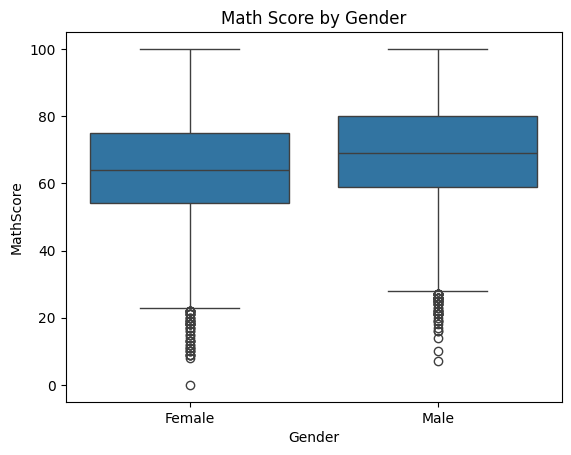

In [ ]:
sns.boxplot(x='Gender',y='MathScore',data=df)
plt.title("Math Score by Gender")
plt.show()


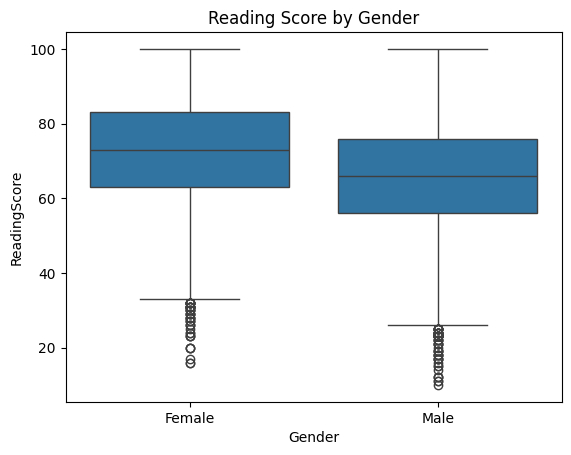

In [ ]:
sns.boxplot(x='Gender',y='ReadingScore',data=df)
plt.title("Reading Score by Gender")
plt.show()

# boxplot is internaly independ on mode().so the box's are varies.

Case Study 4: Effect of Test Perparation on Scores

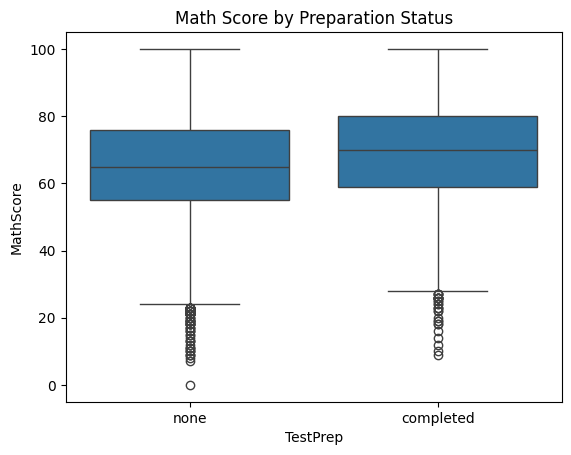

In [ ]:
sns.boxplot(x='TestPrep',y='MathScore',data=df)
plt.title("Math Score by Preparation Status")
plt.show()

# in Test column completed data only will be taken.

Case Study 5: Parent Education & Student Performance

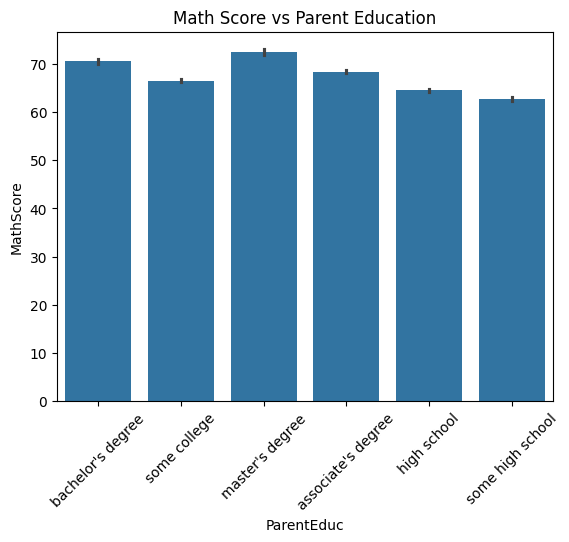

In [ ]:
sns.barplot(x='ParentEduc', y='MathScore',data=df)
plt.xticks(rotation=45)
plt.title("Math Score vs Parent Education")
plt.show()

Case Study 6: Sibling Count & study Hours vs Performance

In [ ]:
df = pd.read_csv('/content/student_data (1).csv')
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

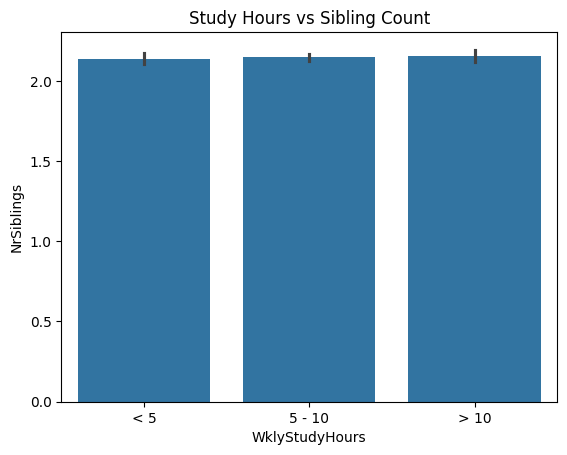

In [ ]:
sns.barplot(x='WklyStudyHours', y='NrSiblings',data=df)
plt.title("Study Hours vs Sibling Count")
plt.show()

Case Study 7: Correlation Analsis

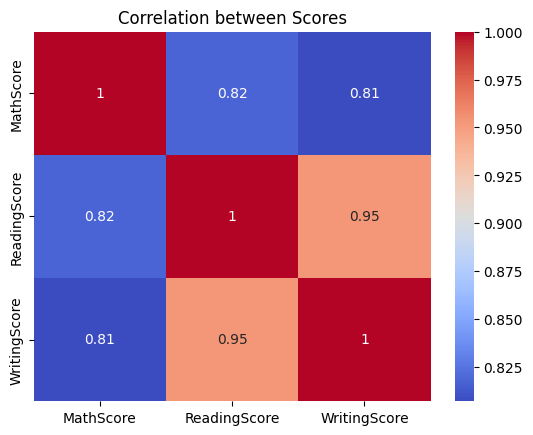

In [ ]:
corr_matrix = df[['MathScore','ReadingScore','WritingScore']].corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation between Scores")
plt.show()

Case Study 8: Clustering Student Based on Scores

In [ ]:
# Case Study 8: Clustering Student Based on Scores

from sklearn.cluster import KMeans  #Kmeans ---> to analysis each values and fills in that range
from sklearn.preprocessing import StandardScaler # StandardScaler ---> to set a range of values


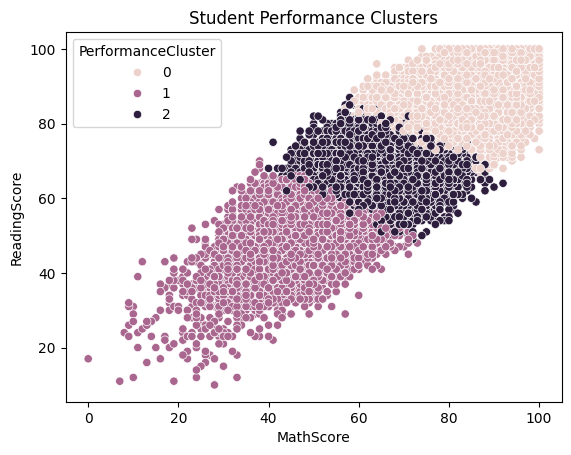

In [ ]:
scaler = StandardScaler()
scores_scaled = scaler.fit_transform(df[['MathScore','ReadingScore','WritingScore']])  # fit_transform ---> take each vaues and put it into a particlaur group.

kmean = KMeans(n_clusters=3,random_state=42)
df['PerformanceCluster'] = kmean.fit_predict(scores_scaled)

sns.scatterplot(x='MathScore',y='ReadingScore',hue='PerformanceCluster',data=df)
plt.title("Student Performance Clusters")
plt.show()
